## Project 3, Supervised Modeling



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import datetime
# For graphics
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# scikit-learn
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error
from scipy.stats             import pearsonr
from sklearn.linear_model    import Ridge
from sklearn.linear_model    import ElasticNet
from sklearn.linear_model    import RidgeCV
from sklearn.linear_model    import LassoCV
from sklearn.linear_model    import ElasticNetCV
from sklearn.model_selection import KFold
from numpy                   import where
from collections             import Counter
from sklearn.datasets        import make_classification
from sklearn.datasets        import make_multilabel_classification
from sklearn.datasets        import make_blobs
from sklearn                 import metrics
from sklearn.tree            import DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

## Part 1

Download fhe following file: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing 

A Human Resources team has just provided you with the file you downloaded. In this they indicate some characteristics that they believe influence the salary that some people who apply to technology companies seek.

This team asks for your help to design a model that can predict how much each applicant will request based on the following characteristics:

- `Experiencia`: Years of experience in the area.
- `Posición`: Position you are looking for; there are three options:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Number of children.
- `Casado`: Is the applicant  married?
  - `0`: No
  - `1`: Yes
- `Educación`: What is the highest degree of studies completed? There are three options:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Amount in Mexican pesos that you request. This variable is the one that is intended to be predicted in this exercise.

### To do:
- Model linear regression correctly:
   - make _dummies_ to categorical values,
   - "split" _dataframe_,
   - standardize sets,
   - apply model,
   - train with training set,
   - predict with set of tests.


- Apply at least two metrics:
   - **MSE**,
   - **RMSE** or
   - **R2**.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data
df = pd.read_csv('/content/drive/MyDrive/1. DataScienci/proyectoModulo_3/rrhh.csv')

In [ ]:
df.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [ ]:
#Create dummy variables for categorical values
df = pd.get_dummies(data=df, columns=['Posicion', 'Hijos', 'Educacion'])
df.head()

,Experiencia,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Hijos_0,Hijos_1,Hijos_2,Hijos_3,Hijos_4,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,1,13540,1,0,0,0,0,0,0,1,1,0,0
1,5.6,0,31240,1,0,0,0,0,1,0,0,0,1,0
2,11.7,0,63880,1,0,0,0,1,0,0,0,0,1,0
3,5.2,1,29960,1,0,0,0,0,1,0,0,0,1,0
4,7.2,1,34710,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
#The correlation of our objective variable with the other variables is seen
df.corr()['Salario'].sort_values(ascending = False)

Salario                   1.000000
Experiencia               0.663780
Posicion_Gerente          0.394371
Educacion_Posgrado        0.163286
Posicion_Coordinador      0.160906
Educacion_Licenciatura    0.135846
Hijos_3                   0.128191
Hijos_4                   0.119430
Casado                    0.085462
Hijos_2                   0.020512
Hijos_1                  -0.039074
Hijos_0                  -0.151351
Educacion_Bachillerato   -0.229514
Posicion_Analista        -0.369587
Name: Salario, dtype: float64

In [ ]:
#Data is standardized
X = df.drop(columns = 'Salario')
y = df['Salario']
media_X = np.mean(X)
X = X - media_X
std_X = np.std(X)
X = X / std_X

In [ ]:
X.head()

,Experiencia,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Hijos_0,Hijos_1,Hijos_2,Hijos_3,Hijos_4,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,-2.296374,0.825029,0.515580,-0.421730,-0.250398,-0.57889,-0.703398,-0.501562,-0.416784,3.673248,0.939808,-0.764713,-0.333333
1,-0.316808,-1.212079,0.515580,-0.421730,-0.250398,-0.57889,-0.703398,1.993771,-0.416784,-0.272239,-1.064047,1.307680,-0.333333
2,2.050908,-1.212079,0.515580,-0.421730,-0.250398,-0.57889,1.421671,-0.501562,-0.416784,-0.272239,-1.064047,1.307680,-0.333333
3,-0.472068,0.825029,0.515580,-0.421730,-0.250398,-0.57889,-0.703398,1.993771,-0.416784,-0.272239,-1.064047,1.307680,-0.333333
4,0.304232,0.825029,-1.939563,2.371185,-0.250398,-0.57889,-0.703398,1.993771,-0.416784,-0.272239,-1.064047,1.307680,-0.333333


In [ ]:
#The model will be split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 5,
                                        shuffle      = True
                                    )

In [ ]:
#The linear regression model will be used
modelo = LinearRegression(normalize=True)
#The model is trained
modelo.fit(X = X_train, y = y_train)

LinearRegression(normalize=True)

In [ ]:
#The coefficients of the model will be extracted
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

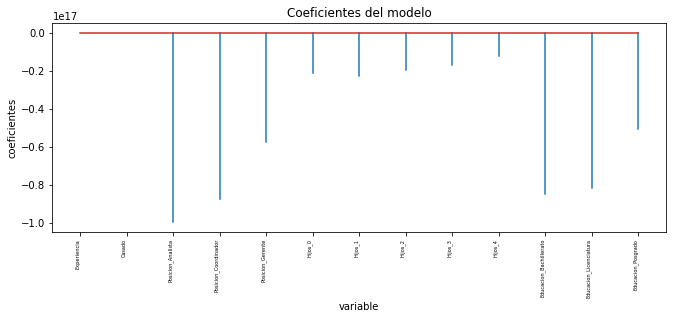

In [ ]:
#The coefficients of the model will be displayed graphically.
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
#Coefficient of each variable
modelo.coef_[0]

array([ 7.95652438e+03,  1.04189259e+02, -9.96885849e+16, -8.76323699e+16,
       -5.76690843e+16, -2.11152517e+16, -2.29163554e+16, -1.95159597e+16,
       -1.72929525e+16, -1.23429190e+16, -8.46158845e+16, -8.18174763e+16,
       -5.08673920e+16])

In [ ]:
#model intercept
modelo.intercept_

array([31123.71071429])

In [ ]:
predicciones = modelo.predict(X_test)

In [ ]:
predicciones = predicciones.flatten()
predicciones[:5]

array([24539.71071429, 24915.71071429, 29475.71071429, 43475.71071429,
       34151.71071429])

In [ ]:
comp = pd.DataFrame({'Real': y_test.flatten(),
                     'Predicción': predicciones})
comp.head(1000)

,Real,Predicción
0,20620,24539.710714
1,23280,24915.710714
2,20320,29475.710714
3,35140,43475.710714
4,35890,34151.710714
...,...,...
295,24210,37915.710714
296,39830,40907.710714
297,27700,32747.710714
298,24950,23611.710714


In [ ]:
#The MSE is calculated
mse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = True
           )
print("")
print(f"El error cuadrático medio de test es: {mse_ols}")


El error cuadrático medio de test es: 39959362.09430527


In [ ]:
#The RMSE is calculated
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"La raiz del error cuadrático medio de test es: {rmse_ols}")


La raiz del error cuadrático medio de test es: 6321.341795402719


## These metrics indicate that the predicted values are a bit far from the actual values, meaning that the model is not as efficient as desired. A regularizer will be applied to see if it is possible to lower that error.

In [ ]:
# Creation and training of the model (with search by CV of the optimal alpha value)
a = 400
modelo = RidgeCV(
            alphas          = np.logspace(-7, 15, a),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

In [ ]:
modelo = modelo.fit(X = X_train, y = y_train)

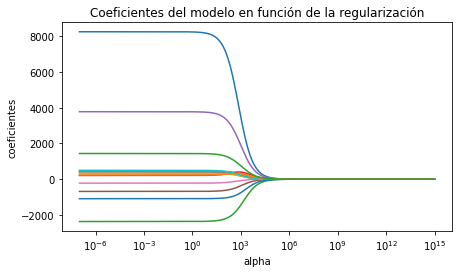

In [ ]:
# Evolution of the coefficients as a function of alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [ ]:
# model.cv_values stores the mse of cv for each value of alpha. Have
# dimensions (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, a)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, a)).std(axis=0)

In [ ]:
# Apply the square root to convert from mse to rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

In [ ]:
optimo = modelo.alphas[np.argmin(rmse_cv)]

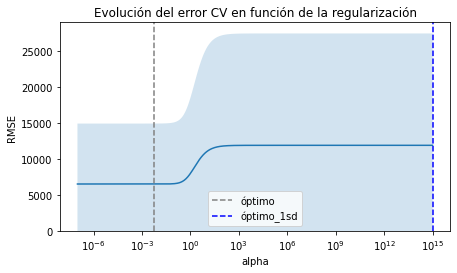

In [ ]:
# Identify the optimum and the optimal + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Error graph +- 1 standard deviation
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Best alpha value found
# ==============================================================================
print(f"El mejor parámetro para alpha es: {modelo.alpha_}")

El mejor parámetro para alpha es: 0.005518926834697374


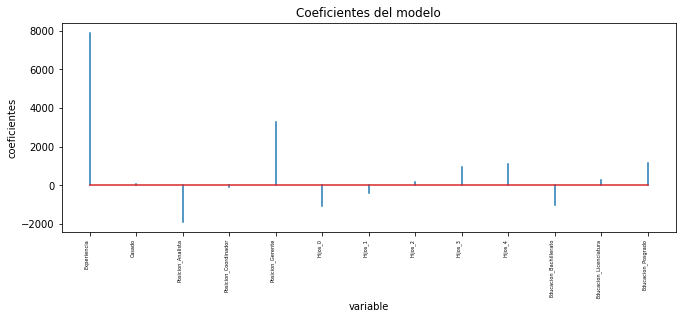

In [ ]:
# Model coefficients
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Prediction test
predicciones1 = modelo.predict(X=X_test)
predicciones1 = predicciones1.flatten()
predicciones1[:5]

array([24526.58741504, 24944.70544918, 29449.08538029, 43386.00923994,
       34113.39090376])

In [ ]:
comp = pd.DataFrame({'Real': y_test.flatten(),
                     'Predicción': predicciones1})
comp.head(5)

,Real,Predicción
0,20620,24526.587415
1,23280,24944.705449
2,20320,29449.085380
3,35140,43386.009240
4,35890,34113.390904


In [ ]:
#Calculate the new RMSE to see if you made a significant change
mse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones1,
                squared = True
             )
print("")
print(f"El error cuadrático medio de test es: {mse_ridge}")


El error cuadrático medio de test es: 39867499.70413499


In [ ]:
#Calculate the new RMSE to see if you made a significant change
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones1,
                squared = False
             )
print("")
print(f"La raiz del error cuadrático medio de test es: {rmse_ridge}")


La raiz del error cuadrático medio de test es: 6314.071563114801


In [ ]:
comp = pd.DataFrame({'Real': y_test.flatten(),
                     'Prediccion inicial': predicciones,
                     'Prediccion reculador': predicciones1})
comp.head(5)

,Real,Prediccion inicial,Prediccion reculador
0,20620,24539.710714,24526.587415
1,23280,24915.710714,24944.705449
2,20320,29475.710714,29449.085380
3,35140,43475.710714,43386.009240
4,35890,34151.710714,34113.390904


## Although the root mean square error has gone down, this is not as significant, so we still have a high mean square error, which shows us that the predictions are a bit off from what we wanted

## Part 2

The team that has shared the information with you has provided you with a new file, which you can download from this *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

This is exactly the same file as in **part 1**, although it now includes a new column, called `Contratado`, which has a `1` if the applicant was hired and a `0` if not.

In this part you will have to make a classification model that can predict if an applicant will be contracted or not, according to the variables that have been shared with you.

### To do:
- Model the logistic regression correctly:
   - make _dummies_ to categorical values,
   - "split" _dataframe_,
   - standardize sets,
   - apply model,
   - train with training set,
   - predict with set of tests.

- Apply confusion table and measure precision.
- Graph a heat map of the confusion box.
- Apply a different classification model (whatever you want) and indicate its precision
- Plot a heat map of the confusion box of the new model.
- Indicate the F1 *score* for the classification models you have made and explain them.


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/1. DataScienci/proyectoModulo_3/rrhh_2.csv")

In [ ]:
df2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [ ]:
df2.describe()

,Experiencia,Hijos,Casado,Salario,Contratado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,30787.060000,0.518000
std,2.577612,1.208823,0.491138,11520.200049,0.499926
min,0.100000,0.000000,0.000000,5630.000000,0.000000
25%,4.600000,0.000000,0.000000,22557.500000,0.000000
50%,6.400000,1.000000,1.000000,29470.000000,1.000000
75%,8.100000,2.000000,1.000000,37922.500000,1.000000
max,15.200000,4.000000,1.000000,83470.000000,1.000000


In [ ]:
#Create dummy variables for categorical values
df2 = pd.get_dummies(data=df2, columns=['Posicion', 'Hijos', 'Educacion'])
df2.head()

,Experiencia,Casado,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Hijos_0,Hijos_1,Hijos_2,Hijos_3,Hijos_4,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,1,13540,1,1,0,0,0,0,0,0,1,1,0,0
1,5.6,0,31240,0,1,0,0,0,0,1,0,0,0,1,0
2,11.7,0,63880,0,1,0,0,0,1,0,0,0,0,1,0
3,5.2,1,29960,1,1,0,0,0,0,1,0,0,0,1,0
4,7.2,1,34710,1,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
# Divide the independent variables with the dependent
X = df2.drop(columns = 'Contratado')
y= df2.Contratado

In [ ]:
# We divide the dataset into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Regresion logistica

In [ ]:
# We initialize the model using default parameters
logreg = LogisticRegression(random_state=16)

# Train the model with the data
logreg.fit(X_train, y_train)

# test the model
y_pred = logreg.predict(X_test)

In [ ]:
# We generate the confusion matrix from the test data of Y and the prediction data of Y
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[91, 23],
       [37, 99]])

In [ ]:
# The precision of the logistic regression model will be removed
precision1 = (cnf_matrix[1,1])/((cnf_matrix[1,1]+cnf_matrix[0,1]))
print(f'La presicion del modelo de regresion logistica es del {precision1}%')

La presicion del modelo de regresion logistica es del 0.8114754098360656%


Text(0.5, 257.44, 'Valores predecidos')

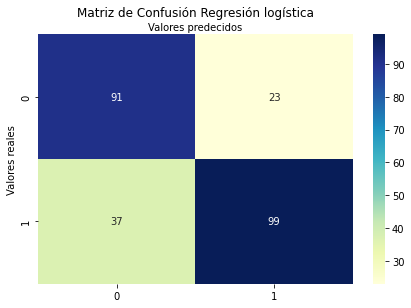

In [ ]:
#Heat map confusion matrix Logistic regression
nombres_clases=[0,1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(nombres_clases))
plt.xticks(tick_marks, nombres_clases)
plt.yticks(tick_marks, nombres_clases)

# Create the heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Matriz de Confusión Regresión logística', y=1.1)
plt.ylabel('Valores reales')
plt.xlabel('Valores predecidos')

In [ ]:
#The f1 Score will be calculated
#Recall
Recall1 = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0])
f1Score1 = 2 * ((Recall1 * precision1)/(Recall1 + precision1))
f1Score1

0.7674418604651162

Decision tree

In [ ]:
# We import the Decision Tree model for regression as follows and assign it to an object.
modelo_tree = DecisionTreeClassifier()

In [ ]:
#We train the model
modelo_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = modelo_tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_tree

array([[109,   5],
       [ 21, 115]])

In [ ]:
#Calculate the precision of the decision tree model
precision2 = (cm_tree[1,1])/((cm_tree[1,1]+cm_tree[0,1]))
print(f'La presicion del modelo de arbol de decisiones es del {precision2}%')

La presicion del modelo de arbol de decisiones es del 0.9583333333333334%


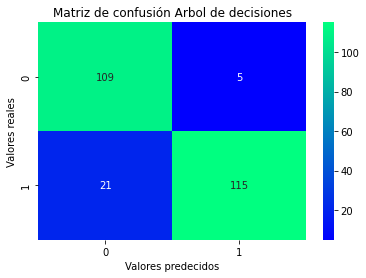

In [ ]:
#Heat map confusion matrix decision tree
sns.heatmap(cm_tree, annot= True, fmt= '.0f', cmap= 'winter')
plt.title('Matriz de confusión Arbol de decisiones')
plt.ylabel('Valores reales')
plt.xlabel('Valores predecidos')
plt.show()

In [ ]:
#F1 Score
Recall2 = cm_tree[1,1]/(cm_tree[1,1]+cm_tree[1,0])
f1Score2 = 2 * ((Recall2 * precision2)/(Recall2 + precision2))
f1Score2

0.8984375

In [ ]:
# The precisions and the F1 Score of the two models executed are compared
datos = pd.DataFrame()

# create the columns
datos['Regresion logistica'] = None
datos['Arbol de decision'] = None

# add rows by their row name
datos.loc['Precision'] = [precision1, precision2]
datos.loc['Recall'] = [Recall1, Recall2]
datos.loc['F1 Score'] = [f1Score1, f1Score2]

print(datos)

           Regresion logistica  Arbol de decision
Precision             0.811475           0.958333
Recall                0.727941           0.845588
F1 Score              0.767442           0.898438


# We can analyze that the F1 Score of each model can be considered good, since it shows us the confidence and harmony of the models, for having high F1 Scores.
#The Decision Tree has an F1 Score of almost 0.9, this means that both its Precision and Recall are high, and show great confidence in the classification model used.
